# Laboratorium 4:  Interpolacja
Jakub Fabia

## Importowanie bibliotek
Importuję niezbędne biblioteki. Biblioteki te obejmują:
- `DataFrames` do manipulacji danymi w formie tabelarycznej,
- `Plots` do tworzenia wykresów,
- `Statistics` do obliczeń statystycznych,
- `Polynomials` do pracy z wielomianami i ich dopasowywania,
- `Interpolations` do wykonywania interpolacji danych.

In [1]:
using Plots, Interpolations, Polynomials, DataFrames, Statistics

## Wartości testowe

Definiuję przedziały wartości na których będą testowane funkcje w zadaniach

In [2]:
x_vals =  1:1:10
y_vals = [rand() for x in x_vals]

x_range = 1:0.001:10

1.0:0.001:10.0

## Zadanie 1 - Metoda Lagrange'a

In [3]:
function lagrange_basis(x, i, x_vals)
    n = length(x_vals)
    L = 1.0
    for j in 1:n
        if j != i
            L *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        end
    end
    return L
end

lagrange_basis (generic function with 1 method)

In [4]:
function lagrange_interpolation(x, x_vals, y_vals)
    n = length(x_vals)
    P = 0.0
    for i in 1:n
        P += y_vals[i] * lagrange_basis(x, i, x_vals)
    end
    return P
end

lagrange_interpolation (generic function with 1 method)

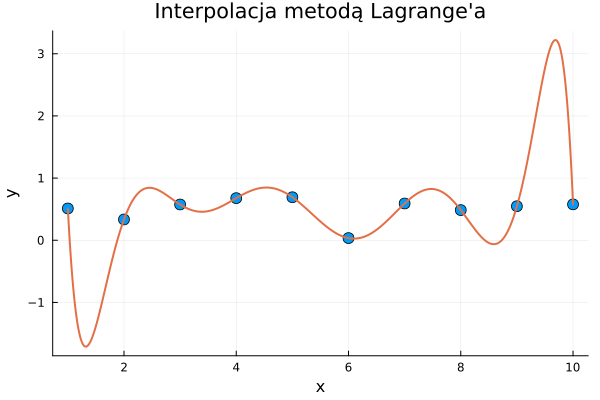

In [5]:
lagr_interp = [lagrange_interpolation(x, x_vals, y_vals) for x in x_range]

scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, lagr_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja metodą Lagrange'a")

## Zadanie 2 - Metoda Ilorazów Różnicowych Newtona'a

In [6]:
function NewtonInterpolation(x_vals, y_vals)
    n = length(x_vals)
    coef = copy(y_vals)
    
    for j in 2:n
        for i in n:-1:j
            coef[i] = (coef[i] - coef[i-1]) / (x_vals[i] - x_vals[i-j+1])
        end
    end
    return (x_vals, coef)
end

NewtonInterpolation (generic function with 1 method)

In [7]:
function newton_evaluate(newt, x)
    x_vals, coef = newt
    n = length(x_vals)
    result = coef[n]
    
    for i in (n-1):-1:1
        result = result * (x - x_vals[i]) + coef[i]
    end
    return result
end

newton_evaluate (generic function with 1 method)

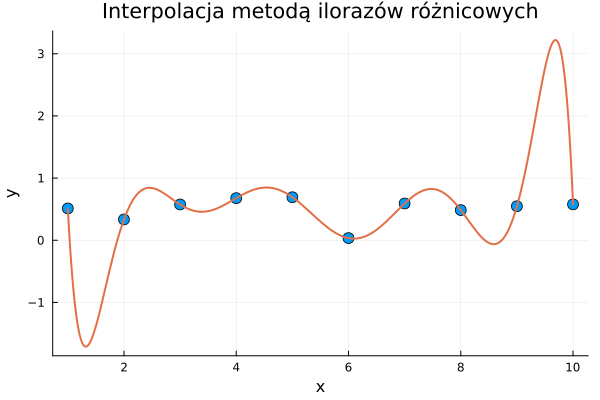

In [8]:
newt = NewtonInterpolation(x_vals, y_vals)
newton_interp = [newton_evaluate(newt, x) for x in x_range]

scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, newton_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja metodą ilorazów różnicowych")

## Zadanie 3 - Funkcja fit z Polynomials.jl

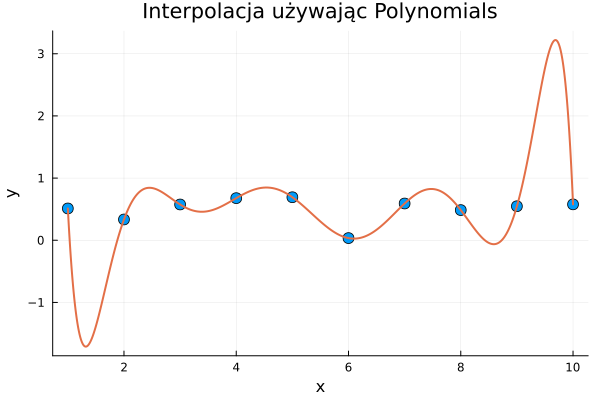

In [9]:
f = fit(x_vals, y_vals)
poly_interp = [f(x) for x in x_range]
scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, poly_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja używając Polynomials")

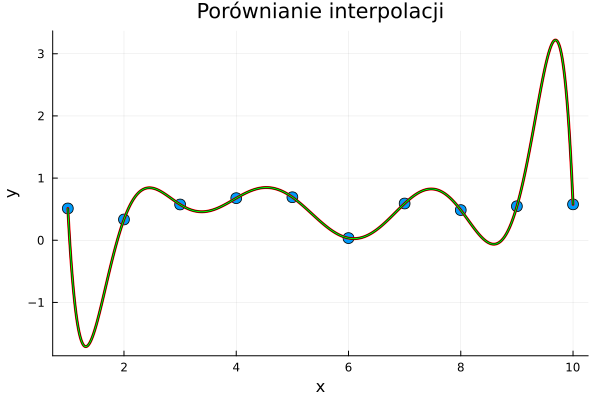

In [10]:
scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, lagr_interp, label="Lagrange'a", linewidth=3, color="#ff0000")
plot!(x_range, newton_interp, label="Newton'a", linewidth=2, color="#000000")
plot!(x_range, poly_interp, label="fit (Polynomials)", linewidth=1, color="#00ff00")
xlabel!("x")
ylabel!("y")
title!("Porównianie interpolacji")

Wszystkie 3 wykresy nachodzą na siebie, wynika to z jednoznaczności wielomianu interpolującego, które mówi, że istnieje tylko 1 wielomian n-tego stopnia przechodzący przez ten sam zbiór punktów. A w tym wypadku mamy wielomian 9-tego stopnia.

## Zadanie 4 - Porównanie czasów działania metod interpolacji

In [11]:
df = DataFrame(Nodes=Int[],LagrTest=Float64[],NewtCalc=Float64[],NewtTest=Float64[],PolynCalc=Float64[],PolynTest=Float64[])
for i in 50:50:1000
    for j in 1:11
        x_gap = 10/i
        x_values = 0:x_gap:10
        y_values = [rand() for x in x_values]
        time1 = @elapsed [lagrange_interpolation(x, x_vals, y_vals) for x in x_range]
        time2 = @elapsed newt = NewtonInterpolation(x_values, y_values)
        time3 = @elapsed [newton_evaluate(newt, x) for x in x_range]
        time4 = @elapsed polynom_calc = fit(x_values,y_values)
        time5 = @elapsed [polynom_calc(x) for x in x_range]
        if j > 1
            push!(df, (i, time1, time2, time3, time4, time5))
        end
    end
end

In [12]:
plot_df = combine(
    groupby(df, :"Nodes"), 
    "LagrTest" => mean,  "LagrTest" => std, 
    "NewtCalc" => mean,  "NewtCalc" => std, 
    "NewtTest" => mean,  "NewtTest" => std, 
    "PolynCalc" => mean,  "PolynCalc" => std, 
    "PolynTest" => mean,  "PolynTest" => std, 
)

20×11 DataFrame
 Row │ Nodes  LagrTest_mean  LagrTest_std  NewtCalc_mean  NewtCalc_std  NewtTe ⋯
     │ Int64  Float64        Float64       Float64        Float64       Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    50      0.0148921   0.0032891      1.55875e-5    1.42762e-6      0.0 ⋯
   2 │   100      0.0137227   0.00459179     3.44347e-5    3.24914e-6      0.0
   3 │   150      0.0128409   0.00107931     7.28847e-5    2.16545e-5      0.0
   4 │   200      0.0132157   0.000721806    0.000128136   2.33052e-5      0.0
   5 │   250      0.0139074   0.00125926     0.000202966   7.63159e-5      0.0 ⋯
   6 │   300      0.0139095   0.00194063     0.000267695   3.49269e-5      0.0
   7 │   350      0.0147212   0.00293212     0.000410889   0.000114167     0.0
   8 │   400      0.0143381   0.00155357     0.000545215   0.000262701     0.0
   9 │   450      0.0137448   0.000400579    0.000596548   5.53753e-5      0.0 ⋯
  10 │   500      0.0135054   0.000986653    0.000764531   0.000149588     0.0
  11 │   550      0.0142319   0.0019301      0.000924814   0.000203445     0.0
  12 │   600      0.0160565   0.00310878     0.00122126    0.000261217     0.0
  13 │   650      0.0133165   0.000523702    0.0012143     0.000133822     0.0 ⋯
  14 │   700      0.0137947   0.00173908     0.00156091    0.000592057     0.0
  15 │   750      0.014567    0.00185925     0.00158222    8.62099e-5      0.0
  16 │   800      0.0141328   0.00201873     0.00214257    0.000496719     0.0
  17 │   850      0.0141462   0.00144334     0.00220968    0.000375608     0.0 ⋯
  18 │   900      0.0158514   0.0038688      0.00274222    0.00060196      0.0
  19 │   950      0.0130833   0.00089549     0.00257508    0.000241839     0.0
  20 │  1000      0.0140463   0.000780051    0.00296825    0.000349683     0.0
                                                               6 columns omitted

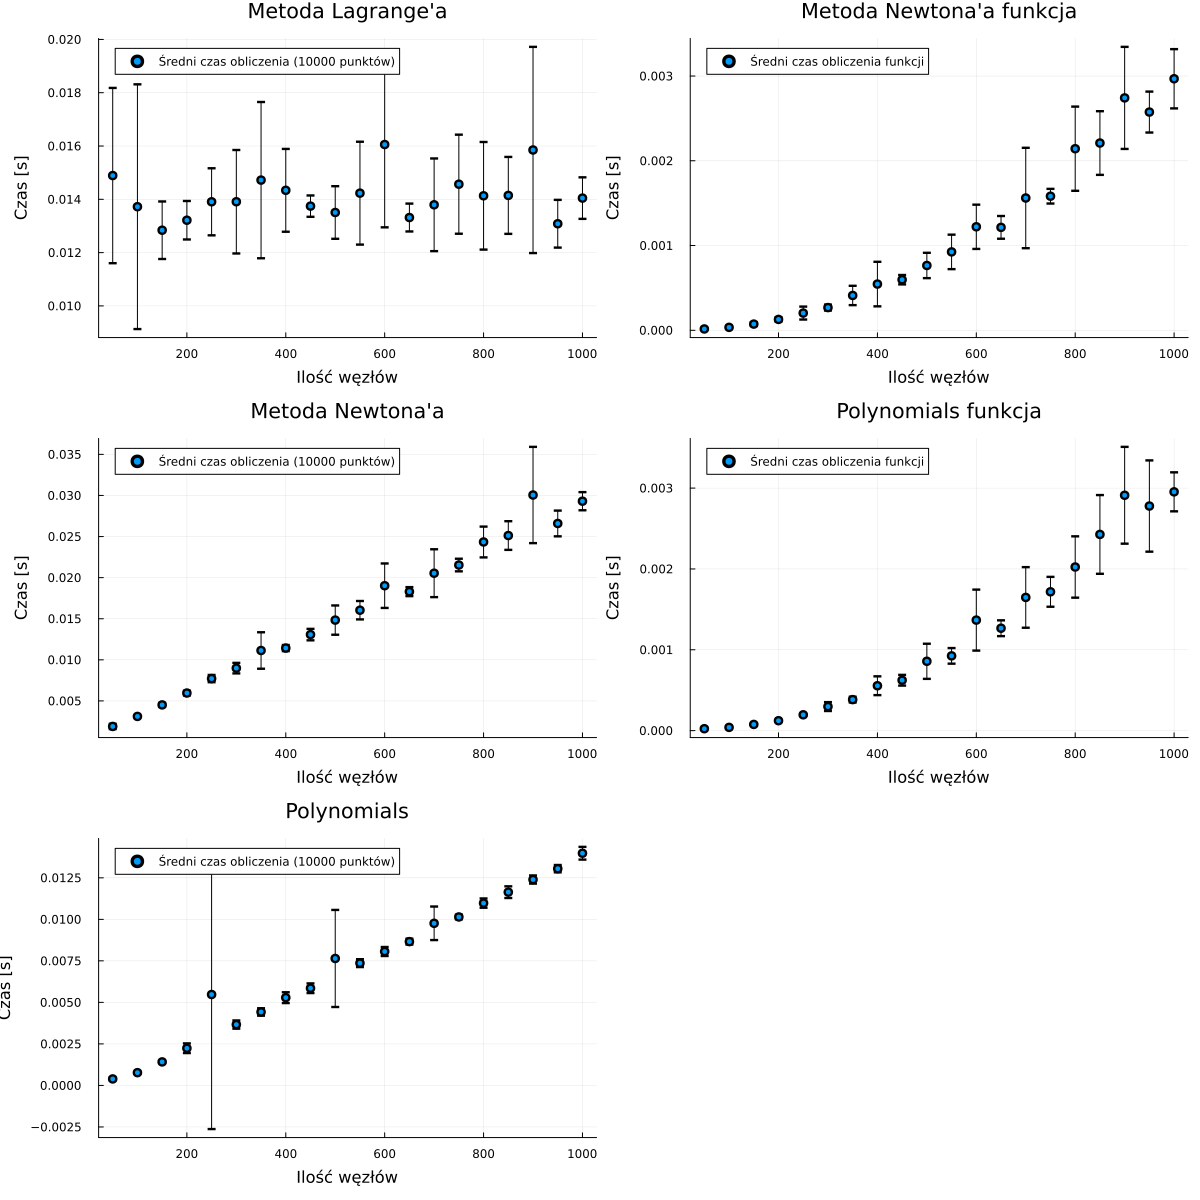

In [13]:
p1 = scatter(
    plot_df.Nodes, 
    plot_df.LagrTest_mean, 
    yerr = plot_df.LagrTest_std, 
    label = "Średni czas obliczenia (10000 punktów)", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Metoda Lagrange'a", 
    legend = :topleft, 
)
p2 = scatter(
    plot_df.Nodes, 
    plot_df.NewtCalc_mean, 
    yerr = plot_df.NewtCalc_std, 
    label = "Średni czas obliczenia funkcji", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Metoda Newtona'a funkcja", 
    legend = :topleft, 
)
p3 = scatter(
    plot_df.Nodes, 
    plot_df.NewtTest_mean, 
    yerr = plot_df.NewtTest_std, 
    label = "Średni czas obliczenia (10000 punktów)", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Metoda Newtona'a", 
    legend = :topleft, 
)
p4 = scatter(
    plot_df.Nodes, 
    plot_df.PolynCalc_mean, 
    yerr = plot_df.PolynCalc_std, 
    label = "Średni czas obliczenia funkcji", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Polynomials funkcja", 
    legend = :topleft, 
)
p5 = scatter(
    plot_df.Nodes, 
    plot_df.PolynTest_mean, 
    yerr = plot_df.PolynTest_std, 
    label = "Średni czas obliczenia (10000 punktów)", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Polynomials", 
    legend = :topleft, 
)


plot(p1, p2, p3, p4, p5, layout = (3, 2), size = (1200, 1200))

## Zadanie 5 - Algorytm Neville'a

In [14]:
function neville_interpolation(x_vals, y_vals, x)
    n = length(x_vals)
    P = copy(y_vals)
    
    for j in 2:n
        for i in n:-1:j
            P[i] = (x - x_vals[i-j+1]) * P[i] - (x - x_vals[i]) * P[i-1]
            P[i] /= (x_vals[i] - x_vals[i-j+1])
        end
    end
    return P[n]
end


neville_interpolation (generic function with 1 method)

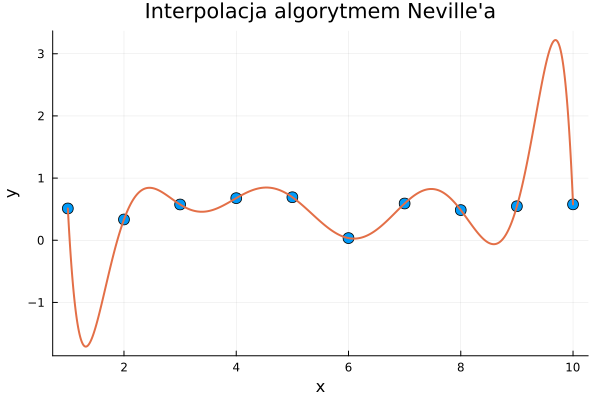

In [15]:
poly_interp = [neville_interpolation(x_vals, y_vals, x) for x in x_range]

scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, poly_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja algorytmem Neville'a")

In [16]:
polynom_calc = fit(x_vals, y_vals)
points = [1, pi, sqrt(2), 5.12345, 8.5, 9.5555, 10]
println("Neville \t\tPolynomial\t\tRóżnica")
for point in points
    println(neville_interpolation(x_vals, y_vals, point), "\t", polynom_calc(point), "\t", abs(neville_interpolation(x_vals, y_vals, point) - polynom_calc(point)))
end

Neville 		Polynomial		Różnica
0.5116264390331883	0.5116264390331935	5.218048215738236e-15
0.507149238064442	0.5071492380639665	4.755085214469545e-13
-1.6067308733233943	-1.6067308733233718	2.2426505097428162e-14
0.6060366488407026	0.6060366488341111	6.591505119502017e-12
-0.042356754177950644	-0.04235675427672092	9.877027667970495e-11
2.9762268313001194	2.976226831046743	2.533764309475828e-10
0.5774519659002204	0.577451965621492	2.787283737148982e-10


## Zadanie 6 - Interpolacja funkcjami sklejanymi, efekt Rungego

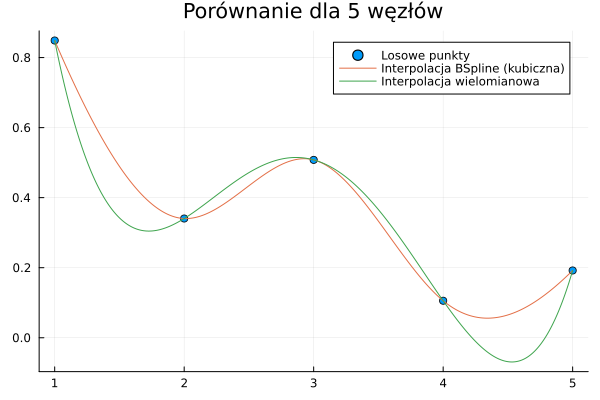

In [17]:
x_nodes_5 = 1:5
y_values_5 = [rand() for x in x_nodes_5]
x_smooth_5 = 1:0.01:5
scatter(x_nodes_5, y_values_5, label="Losowe punkty")
f_bspline_5 = interpolate(y_values_5, BSpline(Cubic(Natural(OnCell()))))
y_smooth_bspline_5 = [f_bspline_5(x) for x in x_smooth_5]
plot!(x_smooth_5, y_smooth_bspline_5, label="Interpolacja BSpline (kubiczna)")
f_poly_5 = fit(x_nodes_5, y_values_5)
y_smooth_poly_5 = [f_poly_5(x) for x in x_smooth_5]
plot!(x_smooth_5, y_smooth_poly_5, label="Interpolacja wielomianowa", title="Porównanie dla 5 węzłów")



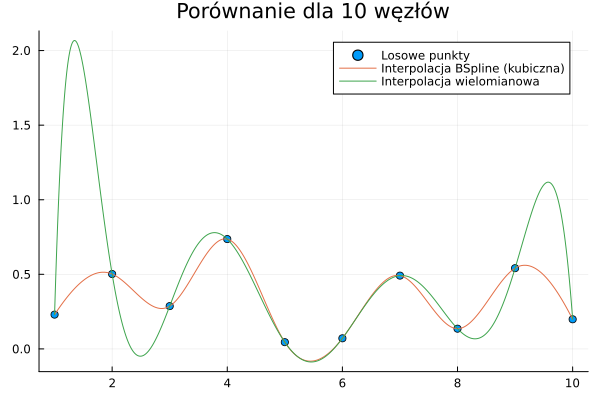

In [18]:
x_nodes_10 = 1:10
y_values_10 = [rand() for x in x_nodes_10]
x_smooth_10 = 1:0.01:10
scatter(x_nodes_10, y_values_10, label="Losowe punkty")
f_bspline_10 = interpolate(y_values_10, BSpline(Cubic(Natural(OnCell()))))
y_smooth_bspline_10 = [f_bspline_10(x) for x in x_smooth_10]
plot!(x_smooth_10, y_smooth_bspline_10, label="Interpolacja BSpline (kubiczna)")
f_poly_10 = fit(x_nodes_10, y_values_10)
y_smooth_poly_10 = [f_poly_10(x) for x in x_smooth_10]
plot!(x_smooth_10, y_smooth_poly_10, label="Interpolacja wielomianowa", title="Porównanie dla 10 węzłów")

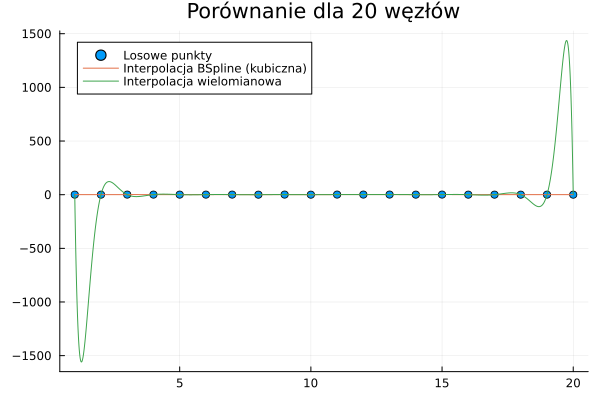

In [19]:
x_nodes_20 = 1:20
y_values_20 = [rand() for x in x_nodes_20]
x_smooth_20 = 1:0.01:20
scatter(x_nodes_20, y_values_20, label="Losowe punkty")
f_bspline_20 = interpolate(y_values_20, BSpline(Cubic(Natural(OnCell()))))
y_smooth_bspline_20 = [f_bspline_20(x) for x in x_smooth_20]
plot!(x_smooth_20, y_smooth_bspline_20, label="Interpolacja BSpline (kubiczna)")
f_poly_20 = fit(x_nodes_20, y_values_20)
y_smooth_poly_20 = [f_poly_20(x) for x in x_smooth_20]
plot!(x_smooth_20, y_smooth_poly_20, label="Interpolacja wielomianowa", title="Porównanie dla 20 węzłów")

Interpolacja wielomianowa `fit` prowadzi do oscylacji na końcach przedziału - efekt Rungego. `BSpline` zapewnia gładkie dopasowanie, eliminuje ten efekt. Jest bardziej stabilnym rozwiązaniem, szczególnie dla większej liczby punktów.